Κουστα Δημητρα
ΑΜ: 1115201600263

Ανδρονικος Φιλανδρας
ΑΜ: 1115201400214


In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import nltk
import sklearn
import gensim
import re

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sqlite3 import Error
import sqlite3
import pickle
import nltk

from itertools import islice
from wordcloud import WordCloud

from sklearn.linear_model import LogisticRegression

%matplotlib inline



C:\ProgramData\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
LocationTrue = r'./True.csv'
LocationFake = r'./Fake.csv'

dfTrue = pd.read_csv(LocationTrue)
dfFake = pd.read_csv(LocationFake)

# 1. Preprocessing

In [9]:
def remove_non_alpha(listOfStrings):
    prossesed_list = []
    
    for w in listOfStrings:
        prossesed_list.append(re.sub(r'\W+', '', w))
    
    prossesed = ''
    
    for item in prossesed_list:
        prossesed+= ' '+item
    
    return prossesed
    
    
    

def preprosses_text(dataset):
    stemmer = PorterStemmer()
    words = stopwords.words("english")
    dataset['cleaned'] = dataset['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())
    dataset['cleaned'] = dataset['cleaned'].str.lower()
    dataset['cleaned'] = dataset['cleaned'].str.split()
    dataset['cleaned'] = dataset['cleaned'].apply(remove_non_alpha)
    
        

In [5]:
titles = dfTrue['title'].tolist()
texts = dfTrue['text'].tolist()

# 2. Data Exploration

### 2.α) True news WordCloud

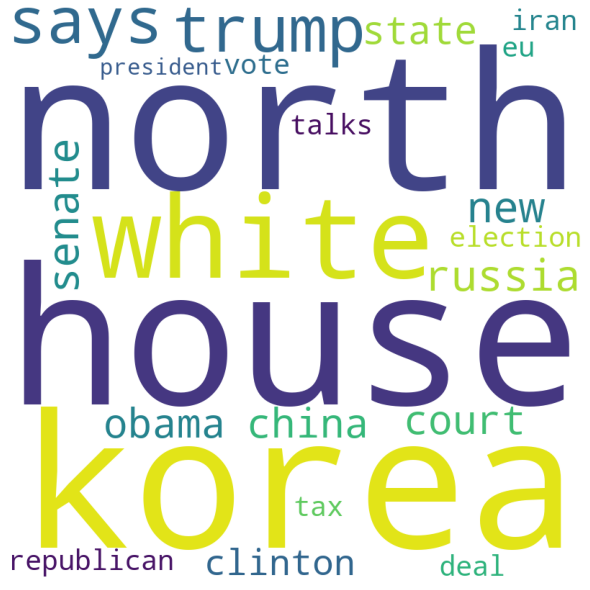

In [6]:
from sklearn.feature_extraction.text import CountVectorizer


titles_true = dfTrue['title'].tolist()

dicTrueTitle = {}

n_gram_range = (1, 2)
stop_words = "english"

for i in range(len(titles_true)):
    count = CountVectorizer(ngram_range=n_gram_range, stop_words=stop_words).fit([titles_true[i]])
    candidates = count.get_feature_names()
    for w in candidates:
        if w in dicTrueTitle:
            dicTrueTitle[w] += 1
        else:
            dicTrueTitle[w] = 1

dicTrueTitle = dict(sorted(dicTrueTitle.items(), key=lambda item: item[1], reverse=True))
# n_items = list(dic.keys())

n_items = list(islice(dicTrueTitle, 25))



# Create the wordcloud
comment_words = ''
for i in range(len(n_items)):
        n_items[i] = n_items[i].lower()
      
comment_words += " ".join(n_items)+" "
    

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

### Fake News WordCloud

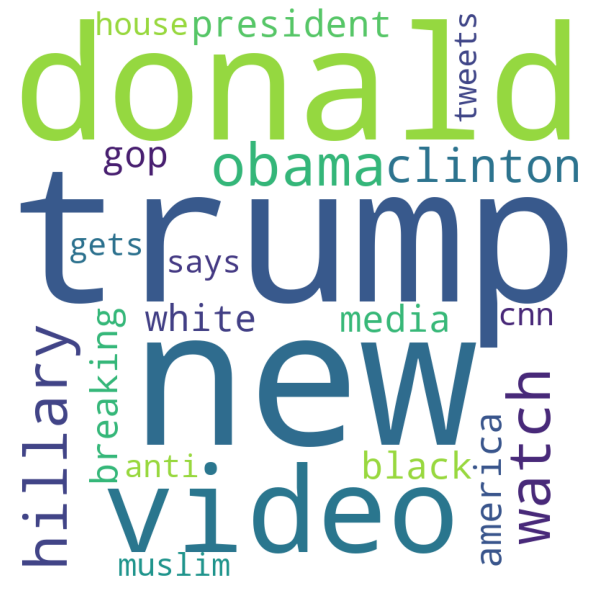

In [7]:
from sklearn.feature_extraction.text import CountVectorizer


titles_Fake = dfFake['title'].tolist()

dicFakeTitle = {}

n_gram_range = (1, 2)
stop_words = "english"

for i in range(len(titles_Fake)):
    count = CountVectorizer(ngram_range=n_gram_range, stop_words=stop_words).fit([titles_Fake[i]])
    candidates = count.get_feature_names()
    for w in candidates:
        if w in dicFakeTitle:
            dicFakeTitle[w] += 1
        else:
            dicFakeTitle[w] = 1

dicFakeTitle = dict(sorted(dicFakeTitle.items(), key=lambda item: item[1], reverse=True))
# n_items = list(dic.keys())

n_items = list(islice(dicFakeTitle, 25))

comment_words = ''
for i in range(len(n_items)):
        n_items[i] = n_items[i].lower()
      
comment_words += " ".join(n_items)+" "
    

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

### 2.β) Graphs

Mesos oros charakthrwn  sta true news titles: 64
Mesos oros charakthrwn  sta fake news titles: 94


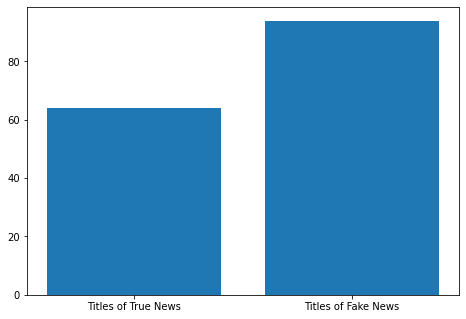

In [8]:
#mesos oros gia true titles :

dfTrue_titles = dfTrue.copy()

dfTrue_titles = pd.DataFrame(dfTrue_titles, columns=['title'])
dfTrue_titles = dfTrue_titles.values.tolist()

num_titles_true=0
for i in dfTrue_titles:
    num_titles_true=num_titles_true+1   
    
count = 0
total_len = 0
for i in dfTrue_titles:
    str = dfTrue_titles[count]
    count = count+1
    
    curr_str = str[0]
    total_len = total_len + len(curr_str)

average_chars = total_len / (count-1)
average_chars = int(average_chars)
av_tr = average_chars
print("Mesos oros charakthrwn  sta true news titles:", average_chars)


#mesos oros gia fake titles :

dfFake_titles = dfFake.copy()

dfFake_titles = pd.DataFrame(dfFake_titles, columns=['title'])
dfFake_titles = dfFake_titles.values.tolist()

num_titles_fake=0
for i in dfFake_titles:
    num_titles_fake=num_titles_fake+1
    
    
count = 0
total_len = 0
average_chars = 0
for i in dfFake_titles:
    str = dfFake_titles[count]
    count = count+1
    
    curr_str = str[0]
    total_len = total_len + len(curr_str)

average_chars = total_len / (count-1)
average_chars = int(average_chars)
av_fal = average_chars
print("Mesos oros charakthrwn  sta fake news titles:", average_chars)

#grafhma

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
titles = ['Titles of True News', 'Titles of Fake News']
nums = [av_tr, av_fal]
ax.bar(titles, nums)
plt.show()

Mesos oros charakthrwn  sta true news texts: 2383
Mesos oros charakthrwn  sta fake news texts: 2547


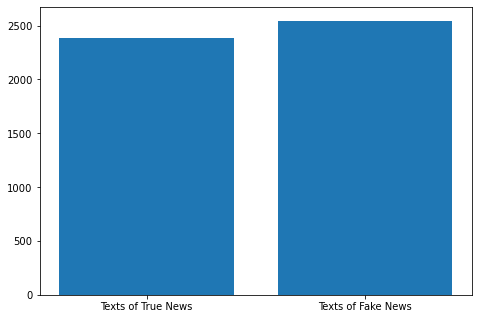

In [9]:
#mesos oros gia true texts:

dfTrue_texts = dfTrue.copy()

dfTrue_texts = dfTrue['text'].tolist()

num_texts_true = len(dfTrue_texts)
    
count = 0
total_len = 0
average_chars = 0
for i in dfTrue_texts:
    str = dfTrue_texts[count]
    count = count+1
        
    curr_str = str
    total_len = total_len + len(curr_str)

average_chars = total_len / (count-1)
average_chars = int(average_chars)
av_tr = average_chars
print("Mesos oros charakthrwn  sta true news texts:", average_chars)

#mesos oros gia fake texts:

dfFake_texts = dfFake.copy()

dfFake_texts = dfFake['text'].tolist()

num_texts_fake = len(dfFake_texts)
    
count = 0
total_len = 0
average_chars = 0
for i in dfFake_texts:
    str = dfFake_texts[count]
    count = count+1
        
    curr_str = str
    total_len = total_len + len(curr_str)

average_chars = total_len / (count-1)
average_chars = int(average_chars)
av_fal = average_chars
print("Mesos oros charakthrwn  sta fake news texts:", average_chars)

#grafhma

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
titles = ['Texts of True News', 'Texts of Fake News']
nums = [av_tr, av_fal]
ax.bar(titles, nums)
plt.show()

### 2.γ) Κατανομή

H sthlh titles sta true exei synolika 213195 lekseis
H sthlh text sta true exei synolika 8259254 lekseis


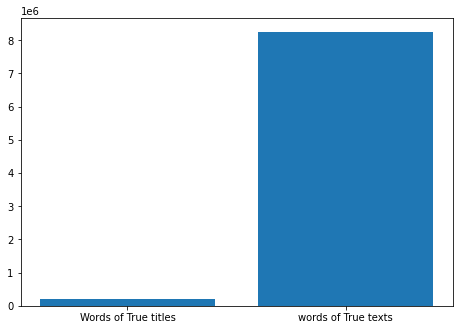

In [10]:
#arxeio True

dfTrue_titles = dfTrue.copy()

dfTrue_titles = pd.DataFrame(dfTrue_titles, columns=['title'])
dfTrue_titles = dfTrue_titles.values.tolist()

num_titles_true=0
for i in dfTrue_titles:
    num_titles_true=num_titles_true+1   
    
count = 0
words = 0
for i in dfTrue_titles:
    str = dfTrue_titles[count]
    count = count+1
    
    curr_str = str[0]
    word_list = curr_str.split()
    words = words + len(word_list)
    
true_titles_words = words    
     
print("H sthlh titles sta true exei synolika", words , "lekseis") 

dfTrue_texts = dfTrue.copy()

dfTrue_texts = pd.DataFrame(dfTrue_texts, columns=['text'])
dfTrue_texts = dfTrue_texts.values.tolist()

num_texts_true=0
for i in dfTrue_texts:
    num_texts_true=num_texts_true+1   
    
count = 0
words = 0
for i in dfTrue_texts:
    str = dfTrue_texts[count]
    count = count+1
    
    curr_str = str[0]
    word_list = curr_str.split()
    words = words + len(word_list)
    
true_texts_words = words    
     
print("H sthlh text sta true exei synolika", words , "lekseis")  

#grafhma

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
titles = ['Words of True titles', 'words of True texts']
nums = [true_titles_words, true_texts_words]
ax.bar(titles, nums)
plt.show()

H sthlh titles sta fake exei synolika 345941 lekseis
H sthlh text sta fake exei synolika 9937110 lekseis


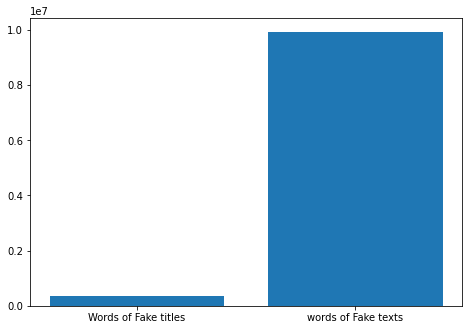

In [11]:
#arxeio Fake

dfFake_titles = dfFake.copy()

dfFake_titles = pd.DataFrame(dfFake_titles, columns=['title'])
dfFake_titles = dfFake_titles.values.tolist()

num_titles_fake=0
for i in dfTrue_titles:
    num_titles_fake=num_titles_fake+1   
    
count = 0
words = 0
for i in dfFake_titles:
    str = dfFake_titles[count]
    count = count+1
    
    curr_str = str[0]
    word_list = curr_str.split()
    words = words + len(word_list)
    
fake_titles_words = words       
     
print("H sthlh titles sta fake exei synolika", words , "lekseis") 

dfFake_texts = dfFake.copy()

dfFake_texts = pd.DataFrame(dfFake_texts, columns=['text'])
dfFake_texts = dfFake_texts.values.tolist()

num_texts_fake=0
for i in dfFake_texts:
    num_texts_fake=num_texts_fake+1   
    
count = 0
words = 0
for i in dfFake_texts:
    str = dfFake_texts[count]
    count = count+1
    
    curr_str = str[0]
    word_list = curr_str.split()
    words = words + len(word_list)
    
fake_texts_words = words    
     
print("H sthlh text sta fake exei synolika", words , "lekseis")  

#grafhma

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
titles = ['Words of Fake titles', 'words of Fake texts']
nums = [fake_titles_words, fake_texts_words]
ax.bar(titles, nums)
plt.show()

### 2.δ) Κατανομή χωρίς stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\30698\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


H sthlh titles sta true exei synolika 192775 lekseis
H sthlh text sta true exei synolika 6177937 lekseis


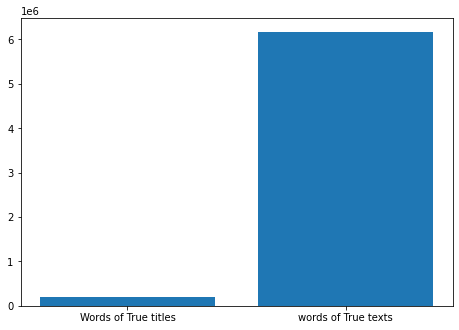

In [12]:
#arxeio True


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#titles

stop_words = set(stopwords.words('english'))

dfTrue_titles = dfTrue.copy()

dfTrue_titles = pd.DataFrame(dfTrue_titles, columns=['title'])
dfTrue_titles = dfTrue_titles.values.tolist()

num_titles_true=0
for i in dfTrue_titles:
    num_titles_true=num_titles_true+1   
    
count = 0
words = 0
for i in dfTrue_titles:
    str = dfTrue_titles[count]
    count = count+1
    
    curr_str = str[0]
    
    word_tokens = word_tokenize(curr_str)
    
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
 
    filtered_sentence = []
 
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
      
    curr_words = 0
    for word in filtered_sentence:
         curr_words = curr_words + 1
    
    words = words + curr_words
    
true_titles_words = words    
     
print("H sthlh titles sta true exei synolika", words , "lekseis") 

#texts

stop_words = set(stopwords.words('english'))

dfTrue_texts = dfTrue.copy()

dfTrue_texts = pd.DataFrame(dfTrue_texts, columns=['text'])
dfTrue_texts = dfTrue_texts.values.tolist()

num_texts_true=0
for i in dfTrue_texts:
    num_texts_true=num_texts_true+1   
    
count = 0
words = 0
for i in dfTrue_texts:
    str = dfTrue_texts[count]
    count = count+1
    
    curr_str = str[0]
        
    word_tokens2 = word_tokenize(curr_str)
    
    filtered_sentence2 = [w for w in word_tokens2 if not w.lower() in stop_words]
 
    filtered_sentence2 = []
 
    for w in word_tokens2:
        if w not in stop_words:
            filtered_sentence2.append(w)
      
    curr_words = 0
    for word in filtered_sentence2:
         curr_words = curr_words + 1
                
    words = words + curr_words
    
true_texts_words = words    
     
print("H sthlh text sta true exei synolika", words , "lekseis")  

#grafhma

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
titles = ['Words of True titles', 'words of True texts']
nums = [true_titles_words, true_texts_words]
ax.bar(titles, nums)
plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\30698\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


H sthlh titles sta true exei synolika 406561 lekseis
H sthlh text sta true exei synolika 6935100 lekseis


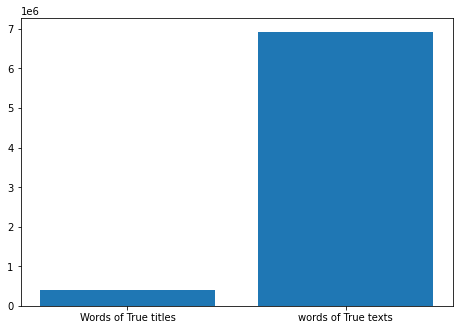

In [13]:
#arxeio Fake

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#titles

stop_words = set(stopwords.words('english'))

dfFake_titles = dfFake.copy()

dfFake_titles = pd.DataFrame(dfFake_titles, columns=['title'])
dfFake_titles = dfFake_titles.values.tolist()

num_titles_fake=0
for i in dfFake_titles:
    num_titles_fake=num_titles_fake+1   
    
count = 0
words = 0
for i in dfFake_titles:
    str = dfFake_titles[count]
    count = count+1
    
    curr_str = str[0]
    
    word_tokens = word_tokenize(curr_str)
    
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
 
    filtered_sentence = []
 
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
      
    curr_words = 0
    for word in filtered_sentence:
         curr_words = curr_words + 1
    
    words = words + curr_words
    
fake_titles_words = words    
     
print("H sthlh titles sta true exei synolika", words , "lekseis") 

#texts

stop_words = set(stopwords.words('english'))

dfFake_texts = dfFake.copy()

dfFake_texts = pd.DataFrame(dfFake_texts, columns=['text'])
dfFake_texts = dfFake_texts.values.tolist()

num_texts_fake=0
for i in dfFake_texts:
    num_texts_true=num_texts_true+1   
    
count = 0
words = 0
for i in dfFake_texts:
    str = dfFake_texts[count]
    count = count+1
    
    curr_str = str[0]
        
    word_tokens2 = word_tokenize(curr_str)
    
    filtered_sentence2 = [w for w in word_tokens2 if not w.lower() in stop_words]
 
    filtered_sentence2 = []
 
    for w in word_tokens2:
        if w not in stop_words:
            filtered_sentence2.append(w)
      
    curr_words = 0
    for word in filtered_sentence2:
         curr_words = curr_words + 1
                
    words = words + curr_words
    
fake_texts_words = words    
     
print("H sthlh text sta Fake exei synolika", words , "lekseis")  

#grafhma

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
titles = ['Words of Fake titles', 'Words of Fake texts']
nums = [fake_titles_words, fake_texts_words]
ax.bar(titles, nums)
plt.show()

### 2.ε) Bigrams

In [14]:
#number of Most common Bygrams we want to show
n = 20

#### Bigrams Gia True Titles

In [15]:
nBygramsTrueTitles = list(islice(dicTrueTitle, len(dicTrueTitle)))

def keepBygrams(string):
    if ' ' in string:
        return True
    return False

nBygramsTrueTitles = list(filter(keepBygrams, nBygramsTrueTitles))

nBygramsTrueTitles = list(islice(nBygramsTrueTitles, n))
print(nBygramsTrueTitles)



['white house', 'north korea', 'trump says', 'islamic state', 'supreme court', 'puerto rico', 'south korea', 'travel ban', 'says trump', 'trump administration', 'factbox trump', 'house speaker', 'new york', 'nuclear deal', 'russia probe', 'foreign minister', 'trump twitter', 'attorney general', 'north korean', 'saudi arabia']


#### Bigrams gia Fake Title

In [16]:
nBygramsFakeTitles = list(islice(dicFakeTitle, len(dicFakeTitle)))

nBygramsFakeTitles = list(filter(keepBygrams,nBygramsFakeTitles))

nBygramsFakeTitles = list(islice(nBygramsFakeTitles, n))
print(nBygramsFakeTitles)


['donald trump', 'president trump', 'hillary clinton', 'white house', 'fox news', 'trump video', 'anti trump', 'bernie sanders', 'ted cruz', 'trump just', 'trump supporter', 'boiler room', 'fake news', 'trump supporters', 'president obama', 'lives matter', 'supreme court', 'yr old', 'black lives', 'watch trump']


#### Bigrams Gia True Text

In [25]:
dicTrueText = {}
textTrue = dfTrue['text'].tolist()

n_gram_range = (2, 2)
stop_words = "english"

for i in range(len(textTrue)):
    try:
        count = CountVectorizer(ngram_range=n_gram_range, stop_words=stop_words).fit([textTrue[i]])
        candidates = count.get_feature_names()
        for w in candidates:
            if w in dicTrueText:
                dicTrueText[w] += 1
            else:
                dicTrueText[w] = 1
    except:
        continue

dicTrueText = dict(sorted(dicTrueText.items(), key=lambda item: item[1], reverse=True))

nBygramsTrueText = list(islice(dicTrueText, n))

print('These are the ', n ,' most common Bygrams in the True News Text Segment')
print(nBygramsTrueText)



These are the  20  most common Bygrams in the True News Text Segment
['donald trump', 'washington reuters', 'united states', 'president donald', 'white house', 'said statement', 'barack obama', 'prime minister', 'president barack', 'new york', 'told reporters', 'told reuters', 'reuters president', 'trump said', 'house representatives', 'hillary clinton', 'secretary state', 'year old', 'trump administration', 'said wednesday']


#### Bigrams gia Fake Text

In [26]:
dicFakeText = {}
textFake = dfFake['text'].tolist()

for i in range(len(textTrue)):
    try:
        count = CountVectorizer(ngram_range=n_gram_range, stop_words=stop_words).fit([textFake[i]])
        candidates = count.get_feature_names()
        for w in candidates:
            if w in dicFakeText:
                dicFakeText[w] += 1
            else:
                dicFakeText[w] = 1
    except:
        continue

dicFakeText = dict(sorted(dicFakeText.items(), key=lambda item: item[1], reverse=True))

nBygramsFakeText = list(islice(dicFakeText, n))

print('These are the ', n, ' most common Bygrams in the Fake News Text Segment')
print(nBygramsFakeText)


These are the  20  most common Bygrams in the Fake News Text Segment
['donald trump', 'featured image', 'getty images', 'hillary clinton', 'united states', 'twitter com', 'white house', 'pic twitter', 'new york', 'president trump', 'president obama', 'fox news', 'year old', 'barack obama', 'screen capture', 'trump campaign', 'trump said', 'american people', 'social media', 'republican party']


# 3. Training and Testing

In [3]:
# dfTrue
#dfFalse

tempTrue = dfTrue.copy()
tempFake = dfFake.copy()

tempTrue['label'] = 1
tempFake['label'] = 0

tempFake

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [4]:

newdf = tempTrue.copy()

newdf = newdf.append(tempFake, ignore_index=True)

# df = df.sample(frac=1).reset_index(drop=True)
newdf = newdf.sample(frac=1).reset_index(drop=True)

# Uncomment the line bellow if you want to have a smaller train and test dataset
# newdf = newdf.iloc[:1000,:]


train_percentage = 0.4
train, test = np.split(newdf, [int(train_percentage*len(newdf))])


In [5]:
train.to_csv('./train.csv')
test.to_csv('./test.csv')

# 2. Classification

### 1 - BoW / TF-IDF

### - Logistic Regression

#### 1. BoW

In [6]:
dataset_train = pd.read_csv('./train.csv')
dataset_test = pd.read_csv('./test.csv')


In [10]:
preprosses_text(dataset_train)
preprosses_text(dataset_test)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer() 



In [12]:
from sklearn.linear_model import LogisticRegression

X_train = dataset_train['cleaned']
y_train = dataset_train['label']
X_test = dataset_test['cleaned']
y_test = dataset_test['label']

pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=1200)),
                     ('scal', sklearn.preprocessing.StandardScaler(with_mean=False)),
                     ('clf', LogisticRegression(random_state=0))])

model = pipeline.fit(X_train, y_train )

ytest = np.array(y_test)

# confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(ytest, model.predict(X_test)))
print(confusion_matrix(ytest, model.predict(X_test)))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14147
           1       0.99      0.99      0.99     12792

    accuracy                           0.99     26939
   macro avg       0.99      0.99      0.99     26939
weighted avg       0.99      0.99      0.99     26939

[[14051    96]
 [  101 12691]]


#### 2. TF-IDF

In [41]:
dataset_train = pd.read_csv('./train.csv')
dataset_test = pd.read_csv('./test.csv')
preprosses_text(dataset_train)
preprosses_text(dataset_test)

In [42]:

vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))


(600, 7044)

In [43]:

X_train = dataset_train['cleaned']
y_train = dataset_train['label']
X_test = dataset_test['cleaned']
y_test = dataset_test['label']

pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=1200)),
                     ('clf', LogisticRegression(random_state=0))])

model = pipeline.fit(X_train, y_train)

ytest = np.array(y_test)

# confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(ytest, model.predict(X_test)))
print(confusion_matrix(ytest, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     13996
           1       0.98      0.98      0.98     12943

    accuracy                           0.98     26939
   macro avg       0.98      0.98      0.98     26939
weighted avg       0.98      0.98      0.98     26939

[[13682   314]
 [  252 12691]]


### - Naive Bayes

In [ ]:
# get the data

# preprosses

# tokenize them

#Do the thing


#### 1. BoW / tf-idf

In [20]:
import seaborn as sns

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# We will visualize the messages with a word cloud
from wordcloud import WordCloud

# Multinomial Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB

# Import Tf-idf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Import the Label Encoder
from sklearn.preprocessing import LabelEncoder

# Import the train test split
from sklearn.model_selection import train_test_split

# To evaluate our model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# I will keep the resulting plots
%matplotlib inline

# Enable Jupyter Notebook's intellisense
%config IPCompleter.greedy=True

In [13]:
# Load the data
dataset_train = pd.read_csv('./train.csv')
dataset_test = pd.read_csv('./test.csv')
preprosses_text(dataset_train)
preprosses_text(dataset_test)

In [17]:
X_train = dataset_train['cleaned']
X_test = dataset_test['cleaned']
y_train = dataset_train['label']
y_test = dataset_test['label']

In [18]:
# Create the tf-idf vectorizer
vectorizer = TfidfVectorizer(strip_accents='ascii')

# First fit the vectorizer with our training set
tfidf_train = vectorizer.fit_transform(X_train)

# Now we can fit our test data with the same vectorizer
tfidf_test = vectorizer.transform(X_test)

In [21]:
# Initialize the Multinomial Naive Bayes classifier
nb = MultinomialNB()

# Fit the model
nb.fit(tfidf_train, y_train)

# Print the accuracy score
print("Accuracy:",nb.score(tfidf_test, y_test))

Accuracy: 0.9352982664538402


Confusion Matrix

[[13365   782]
 [  961 11831]]


Classification Report

              precision    recall  f1-score   support

           0       0.93      0.94      0.94     14147
           1       0.94      0.92      0.93     12792

    accuracy                           0.94     26939
   macro avg       0.94      0.93      0.94     26939
weighted avg       0.94      0.94      0.94     26939


ROC AUC Score: 0.9347990923543654


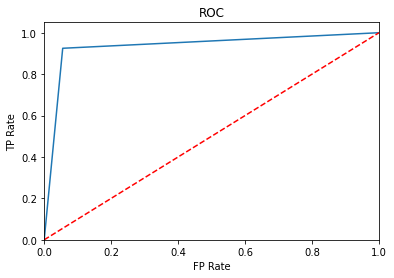

In [22]:
# Predict the labels
y_pred = nb.predict(tfidf_test)

# Print the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n")
print(cm)

# Print the Classification Report
cr = classification_report(y_test, y_pred)
print("\n\nClassification Report\n")
print(cr)


# Print the Receiver operating characteristic Auc score
auc_score = roc_auc_score(y_test, y_pred)
print("\nROC AUC Score:",auc_score)

# Get probabilities.
y_pred_proba = nb.predict(tfidf_test)

# Get False Positive rate, True Positive rate and the threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Visualize the ROC curve.
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC')
plt.show()

### - Support Vector Machines

#### 1. BoW / tf-idf

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline 
from gensim import parsing 


   Unnamed: 0                                              title  \
0           0  Boiler Room EP #75 – Limited Hangouts, Syria a...   
1           1  WATCH: KIM JONG-UN Blows Up US Aircraft Carrie...   
2           2  \r\r\r\r\r\r\r\nWATCH: Democratic Rep Delivers...   
3           3  DISASTER CAPITALISTS: How Bill And Hillary’s “...   
4           4  OBAMA AND VALERIE JARRETT Finalize Executive A...   

                                                text          subject  \
0  Tune in to the Alternate Current Radio Network...          US_News   
1  President @realDonaldTrump:  I inherited a mes...         politics   
2  Massachusetts Rep. Jim McGovern brought the Ho...             News   
3  Hillary was Secretary of State an unimaginable...         politics   
4  It s almost as though we don t even have a Con...  Government News   

                 date  label  
0  September 21, 2016      0  
1        Mar 21, 2017      0  
2         May 4, 2017      0  
3         Oct 7, 2016      0

In [24]:
# Load the data
dataset_train = pd.read_csv('./train.csv')
dataset_test = pd.read_csv('./test.csv')
preprosses_text(dataset_train)
preprosses_text(dataset_test)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

#for grouping similar words such as 'trying" and "try" are same words
def parse(s):
    parsing.stem_text(s)
    return s

# #applying parsing to comments.
# for i in range(0,len(df)):
#     df.iloc[i,2]=parse(df.iloc[i,2])
    
# #Seperate data into feature and results
# X, y = df['text'].tolist(), df['label'].tolist()

X_train = dataset_train['cleaned']
X_test = dataset_test['cleaned']
y_train = dataset_train['label']
y_test = dataset_test['label']

#Split data in train and test sets.
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)



#Use pipeline to carry out steps in sequence with a single object
#SVM's rbf kernel gives highest accuracy in this classification problem.
text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', SVC(kernel='rbf'))])

#train model
text_clf.fit(X_train, y_train)

ytest = np.array(y_test)

# #predict class form test data 
# predicted = text_clf.predict(X_test)


# confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(ytest, text_clf.predict(X_test)))
print(confusion_matrix(ytest, text_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14147
           1       0.99      0.99      0.99     12792

    accuracy                           0.99     26939
   macro avg       0.99      0.99      0.99     26939
weighted avg       0.99      0.99      0.99     26939

[[13961   186]
 [  100 12692]]


### 2 - Word2Vec (Pre-Trained Embeddings)

In [11]:
import sys

# !pip install tensorflow

from sklearn.model_selection import train_test_split
import tensorflow as tf

In [12]:
# !pip install tensorflow_hub
# !pip install tensorflow_text

import numpy as np
import tensorflow_hub as hub
import tensorflow_text

###### Κάνουμε load έτοιμα word embeddings : 

In [13]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual/3")

In [15]:
import string

# !pip install preprocessor
# !pip install tweet-preprocessor
# !pip install spacy

import preprocessor as p
from spacy.lang.en import stop_words as spacy_stopwords  # we use spacy's list of stop words to clean our data

# p.set_options(p.OPT.URL, p.OPT.MENTION)  # removes mentions and URLs only
stop_words = spacy_stopwords.STOP_WORDS
punctuations = string.punctuation


def clean(text):
    text = p.clean(text)
    text = re.sub(r'\W+', ' ', text)  # remove non-alphanumeric characters
    text = re.sub(r"\d+", "number", text)
   
    if len(text.strip().split()) < 3:
        return None
    text = text.lower() 
    
    return text.strip() # remove redundant spaces

In [16]:
df = pd.read_csv("train.csv")

In [17]:
msg_train, msg_test, y_train, y_test = train_test_split(df.text, df.label)

In [18]:
X_test = embed(msg_test)
X_test.shape

TensorShape([75, 512])

In [19]:
splits = np.array_split(msg_train, 5)
l = list()
for split in splits:
    l.append(embed(split))

In [20]:
X_train = tf.concat(l, axis=0)
del l
X_train.shape

TensorShape([225, 512])

###### Τα δεδομένα μας για word embeddings είναι έτοιμα και μπορούμε στην συνέχεια να τα εφαρμόσουμε στους Classifiers : 

### - Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)


y_pred = clf.predict(np.array(X_test))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        47
           1       0.77      0.82      0.79        28

    accuracy                           0.84        75
   macro avg       0.83      0.84      0.83        75
weighted avg       0.84      0.84      0.84        75



### - Support Vector Machines

In [22]:
from sklearn.svm import SVC
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [23]:
clf = SVC()
clf.fit(X_train, y_train)

y_pred = clf.predict(np.array(X_test))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88        47
           1       0.76      0.89      0.82        28

    accuracy                           0.85        75
   macro avg       0.84      0.86      0.85        75
weighted avg       0.86      0.85      0.86        75



### - Random Forests

In [24]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(np.array(X_test))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        47
           1       0.82      0.82      0.82        28

    accuracy                           0.87        75
   macro avg       0.86      0.86      0.86        75
weighted avg       0.87      0.87      0.87        75



### - Naive Bayes

##### ( Negative Values Error : Not Solved)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing


clf = MultinomialNB()
# clf.fit(X_train, y_train)

# y_pred = clf.predict(np.array(X_test))
# print(classification_report(y_test, y_pred))

# Συμπεράσματα

#### Για το bow/tf-idf: 

#### Στο Logistic Regression : Με bag of words έχουμε μεγαλύτερο precision, υψηλότερο σκορ, και καλύτερο accuracy.

#### Στο Naive Bayes : Με tf-idf έχουμε αρκετά υψηλά αποτελέσματα σε όλες τις παραμέτρους 

#### Στο SVM :  Με tf-idf έχουμε πάρα πολύ υψηλό presicion αλλά ιδιαίτερα χαμηλό σκορ και μεσέο accuracy.

#### Συνολικά : Συγκρίνοντας όλους τους αλγορίθμους με χρήση bow/tf-idf παρατηρούμε ότι μεγαλύτερο accuracy και f1-score έχει ο Logistic Regression και με bow και με tf-idf, ακολουθεί ο Naive Bayes με tf-idf και τελευταίος ο SVM. 

#### Για το Word2Vec : Παρατηρούμε ότι με τα word embeddings, υψηλότερο f1-score και καλύτερο accuracy έχει ο Naive Bayes χωρίς όμως η διαφορά να είναι πολύ μεγάλη σε σχέση με τους υπόλοιπους αλγορίθμους. Αξίζει να σημειωθεί, οτι ο SVM είχε το μεγαλύτερο precision. Χειρότερος αλγόριθμος σε αυτή τη περίπτωση φαίνεται να είναι ο Logistic Regression.

#### BoW/tf-idf vs Word2Vec : Στην περίπτωση του Logistic Regression, τα αποτελέσματα με bow/tfidf είναι αρκετά καλύτερα σε σχέση με word2vec. Αντιθέτως, στην περίπτωση του SVM, με word2vec έχουμε σημαντικά υψηλότερα αποτελέσματα σε σχέση με tf-idf.